In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Reviews.csv")
df

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
54184  home theatres       5   
54185  home theatres       5   
54186  home theatres       5   
54187  home theatres       5   
54188  home theatres       1   

                                            Review_title        Review_Date  \
0                                     Best Gaming Laptop   8 September 2020   
1      An incredibly capabale gaming laptop that has ...       28 June 2020   
2      Headphones/Headset Static Noise Issue | Sound ...  27 September 2020   
3                              Best Gaming Computer 2020       29 June 2020   
4                                      Not what it looks      19 April 2021   
...                                                  ...                ...   
54184                                  Worth every penny       2 months ago   
54185                                 Highly recommended       4 months ago   
54186                                             Super!       4 months ago   
54187                                          Just wow!       4 months ago   
54188                                   Terrible product       4 months ago   

                                                  Review  
0      Best gaming laptop for AAA Games and for Creat...  
1      This is a very good laptop that is very capabl...  
2      Hi everyone,\n\nI just want to give a word of ...  
3      I bought this laptop as a last second mobile C...  
4      There is no doubt this is a powerful laptop, b...  
...                                                  ...  
54184                                 super good product  
54185                                                 Ok  
54186                                Very nice nice Bess  
54187                                              Super  
54188                            Very very worst product  

[54189 rows x 5 columns]

In [3]:
df.dtypes

Product_type    object
Rating           int64
Review_title    object
Review_Date     object
Review          object
dtype: object

In [4]:
df.isnull().sum()

Product_type    0
Rating          0
Review_title    4
Review_Date     0
Review          5
dtype: int64

#### Since there are less than 0.5% of null values we can drop them

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Product_type    0
Rating          0
Review_title    0
Review_Date     0
Review          0
dtype: int64

### DATA PRE PROCESSING

#### REMOVING REVIEWS IN  SPANISH

In [6]:
search_values = [' il ',' un ', ' contro ', ' la ', ' è ', ' una ', ' Buena ', ' de ', ' equipo '] # Common Spanish words
a = df[df.Review.str.contains('|'.join(search_values ),case=False)] # Extracting rows which contain spanish reviews

for i in a.Review:
    print(i.replace('\n',"  "))
    print("-----------------------------")
print(len(a))
print(a.index)

CONSEGNA: impeccabile, con DHL, rapidi, veloci e professionali, il laptop è arrivato in perfette condizioni, anche la scatola    PRODOTTO: Come da descrizione, potente, veloce, versatile, con ben due slot per due memorie aggiuntive, una SATA III da 2,5 (Decidete voi se HDD O SSD) e poi uno spazio per una SSD Pcie NVME M.2.    PRO: Scheda Grafica e Processore impeccabili    CONTRO: Occhio alle temperature (Consiglio un pad di raffreddamento), per il resto è perfetto    PREZZO: Perfetto, e in linea con ciò che il prodotto da, una potenza di calcolo mostruosa e tanta tanta ram da poter usare per tenere una marea di programmi aperti insieme..    PROVA PRATICA: Giochi usati GTA V, Apex Legends, CSGO, Fallout 4, Rainbow Six Siege (Superano tutti i 70fps tranquillamente)
-----------------------------
Questo computer è molto bello, ha delle prestazioni fantastiche, mi troppo molto bene negli sparatutto e fps.  La qualità audio e video è altissima, l’ unico “problema”(se lo vogliamo chiamare co

In [7]:
b = list(a.index)
df.drop(b,inplace=True)
df.reset_index(inplace=True,drop=True)
df

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
53908  home theatres       5   
53909  home theatres       5   
53910  home theatres       5   
53911  home theatres       5   
53912  home theatres       1   

                                            Review_title        Review_Date  \
0                                     Best Gaming Laptop   8 September 2020   
1      An incredibly capabale gaming laptop that has ...       28 June 2020   
2      Headphones/Headset Static Noise Issue | Sound ...  27 September 2020   
3                              Best Gaming Computer 2020       29 June 2020   
4                                      Not what it looks      19 April 2021   
...                                                  ...                ...   
53908                                  Worth every penny       2 months ago   
53909                                 Highly recommended       4 months ago   
53910                                             Super!       4 months ago   
53911                                          Just wow!       4 months ago   
53912                                   Terrible product       4 months ago   

                                                  Review  
0      Best gaming laptop for AAA Games and for Creat...  
1      This is a very good laptop that is very capabl...  
2      Hi everyone,\n\nI just want to give a word of ...  
3      I bought this laptop as a last second mobile C...  
4      There is no doubt this is a powerful laptop, b...  
...                                                  ...  
53908                                 super good product  
53909                                                 Ok  
53910                                Very nice nice Bess  
53911                                              Super  
53912                            Very very worst product  

[53913 rows x 5 columns]

#### WE CAN CONCATENATE Review AND Review_Title column as both are texts.

In [8]:
df["Reviews_Combined"] = df["Review_title"] +" "+ df["Review"]
df

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
53908  home theatres       5   
53909  home theatres       5   
53910  home theatres       5   
53911  home theatres       5   
53912  home theatres       1   

                                            Review_title        Review_Date  \
0                                     Best Gaming Laptop   8 September 2020   
1      An incredibly capabale gaming laptop that has ...       28 June 2020   
2      Headphones/Headset Static Noise Issue | Sound ...  27 September 2020   
3                              Best Gaming Computer 2020       29 June 2020   
4                                      Not what it looks      19 April 2021   
...                                                  ...                ...   
53908                                  Worth every penny       2 months ago   
53909                                 Highly recommended       4 months ago   
53910                                             Super!       4 months ago   
53911                                          Just wow!       4 months ago   
53912                                   Terrible product       4 months ago   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
53908                                 super good product   
53909                                                 Ok   
53910                                Very nice nice Bess   
53911                                              Super   
53912                            Very very worst product   

                                        Reviews_Combined  
0      Best Gaming Laptop Best gaming laptop for AAA ...  
1      An incredibly capabale gaming laptop that has ...  
2      Headphones/Headset Static Noise Issue | Sound ...  
3      Best Gaming Computer 2020 I bought this laptop...  
4      Not what it looks There is no doubt this is a ...  
...                                                  ...  
53908               Worth every penny super good product  
53909                              Highly recommended Ok  
53910                         Super! Very nice nice Bess  
53911                                    Just wow! Super  
53912           Terrible product Very very worst product  

[53913 rows x 6 columns]

In [9]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [10]:
dictionary = {}

In [11]:
def clean_text(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'[0-9]', '', text)
    
    # Remove stop words
    stops = set(stopwords.words('english'))
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    # Lemmatization
    lema = WordNetLemmatizer()
    text = text.split()
    text = [lema.lemmatize(w) for w in text]
    text = " ".join(text)
    
    # Adding words to dictionary
    text = text.split()
    for word in text:
        if word in dictionary:
            dictionary[word]+=1
        else:
            dictionary[word]=1
    text = " ".join(new_text)

    return text

In [12]:
df.Reviews_Combined = df.Reviews_Combined.apply(clean_text)
print("Cleaning complete.")
df

Cleaning complete.


Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
53908  home theatres       5   
53909  home theatres       5   
53910  home theatres       5   
53911  home theatres       5   
53912  home theatres       1   

                                            Review_title        Review_Date  \
0                                     Best Gaming Laptop   8 September 2020   
1      An incredibly capabale gaming laptop that has ...       28 June 2020   
2      Headphones/Headset Static Noise Issue | Sound ...  27 September 2020   
3                              Best Gaming Computer 2020       29 June 2020   
4                                      Not what it looks      19 April 2021   
...                                                  ...                ...   
53908                                  Worth every penny       2 months ago   
53909                                 Highly recommended       4 months ago   
53910                                             Super!       4 months ago   
53911                                          Just wow!       4 months ago   
53912                                   Terrible product       4 months ago   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
53908                                 super good product   
53909                                                 Ok   
53910                                Very nice nice Bess   
53911                                              Super   
53912                            Very very worst product   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
53908               worth every penny super good product  
53909                              highly recommended ok  
53910                         super! very nice nice bess  
53911                                    just wow! super  
53912           terrible product very very worst product  

[53913 rows x 6 columns]

In [13]:
len(dictionary)

31187

##### We Can get the count of words with frequencies more than the threshold. This can be used to set the 'max_features' parameter

In [14]:
count = 0
threshold = 10
feature_count = 0
for word, count in dictionary.items():
    if count > threshold:
        feature_count+=1
feature_count

6797

### EDA

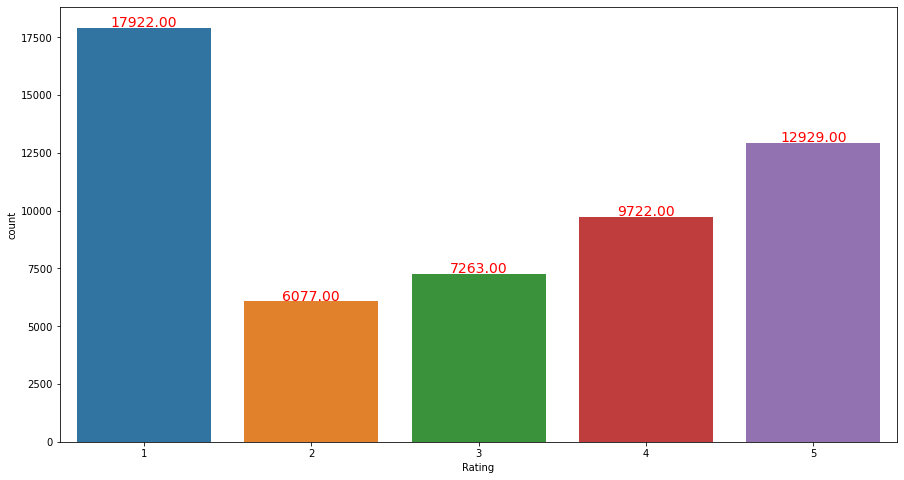

In [15]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Rating'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

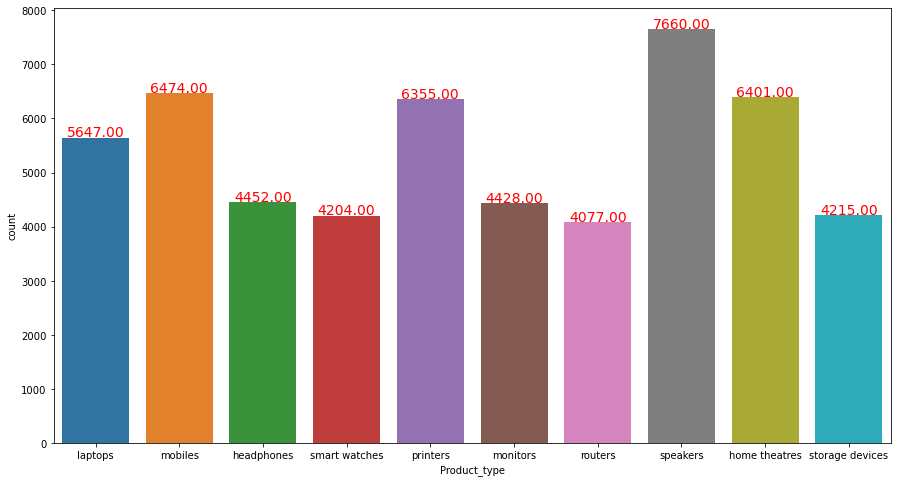

In [16]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Product_type'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

### DATA BALANCING

#### TO BALANCE THE DATA SOME 1 STAR REVIEWS FROM DIFFERENT PRODUCT TYPES CAN BE DROPPED

In [17]:
speakers_1 = list(df.loc[(df['Product_type']=='speakers') & (df['Rating']==1)].index)
speakers_1 = speakers_1[:int(len(speakers_1)/2)]
len(speakers_1)

1491

In [18]:
home_theatre_1 = list(df.loc[(df['Product_type']=='home theatres') & (df['Rating']==1)].index)
home_theatre_1 = home_theatre_1[:int(len(home_theatre_1)/2)]
len(home_theatre_1)

1215

In [19]:
printers_1 = list(df.loc[(df['Product_type']=='printers') & (df['Rating']==1)].index)
printers_1 = printers_1[:int(len(printers_1)/2)]
len(printers_1)

1226

In [20]:
mobiles_1 = list(df.loc[(df['Product_type']=='mobiles') & (df['Rating']==1)].index)
mobiles_1 = mobiles_1[:int(len(mobiles_1)/4)]
len(mobiles_1)

1063

In [21]:
speakers_5 = list(df.loc[(df['Product_type']=='speakers') & (df['Rating']==5)].index)
speakers_5 = speakers_5[:int(len(speakers_5)/2)]
len(speakers_5)

910

In [22]:
drop_index = speakers_1 + home_theatre_1 + printers_1 + mobiles_1 + speakers_5
len(drop_index)

5905

In [23]:
df.drop(drop_index,inplace=True,axis=0)
df.reset_index(inplace=True, drop=True)
df

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
48003  home theatres       5   
48004  home theatres       5   
48005  home theatres       5   
48006  home theatres       5   
48007  home theatres       1   

                                            Review_title        Review_Date  \
0                                     Best Gaming Laptop   8 September 2020   
1      An incredibly capabale gaming laptop that has ...       28 June 2020   
2      Headphones/Headset Static Noise Issue | Sound ...  27 September 2020   
3                              Best Gaming Computer 2020       29 June 2020   
4                                      Not what it looks      19 April 2021   
...                                                  ...                ...   
48003                                  Worth every penny       2 months ago   
48004                                 Highly recommended       4 months ago   
48005                                             Super!       4 months ago   
48006                                          Just wow!       4 months ago   
48007                                   Terrible product       4 months ago   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
48003                                 super good product   
48004                                                 Ok   
48005                                Very nice nice Bess   
48006                                              Super   
48007                            Very very worst product   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
48003               worth every penny super good product  
48004                              highly recommended ok  
48005                         super! very nice nice bess  
48006                                    just wow! super  
48007           terrible product very very worst product  

[48008 rows x 6 columns]

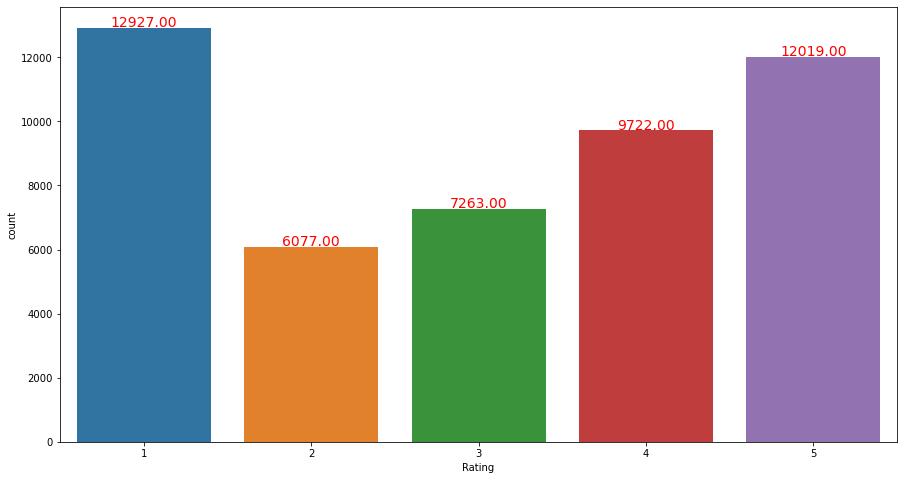

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Rating'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* 1 star and 5 star ratings are the most common ratings.

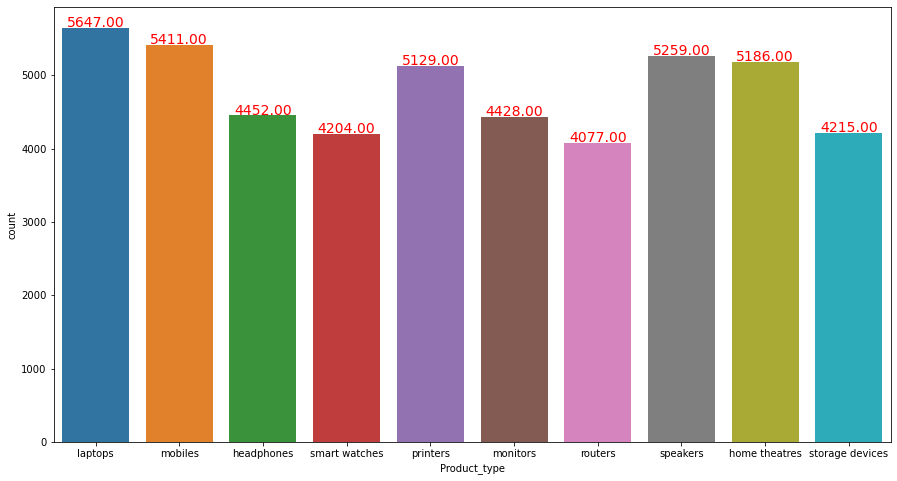

In [25]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Product_type'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Reviews are almost equally distributed across product types .
* Laptops have the most reviews while routers have the least.

### FEATURE ENGINEERING

#### Separating dfs based on review date

In [26]:
temp_df_1 = df[~df.Review_Date.str.contains('ago|Today',case=False)].copy()
temp_df_1

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
47980  home theatres       5   
47981  home theatres       5   
47983  home theatres       5   
47990  home theatres       5   
47992  home theatres       5   

                                            Review_title        Review_Date  \
0                                     Best Gaming Laptop   8 September 2020   
1      An incredibly capabale gaming laptop that has ...       28 June 2020   
2      Headphones/Headset Static Noise Issue | Sound ...  27 September 2020   
3                              Best Gaming Computer 2020       29 June 2020   
4                                      Not what it looks      19 April 2021   
...                                                  ...                ...   
47980                                Best in the market!          Dec, 2019   
47981                                          Fabulous!          Aug, 2019   
47983                                 Highly recommended          Feb, 2020   
47990                                          Fabulous!          Aug, 2019   
47992                                 Highly recommended          Feb, 2020   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
47980        Nice but no inbuild Bluetooth connectivity.   
47981                                               nice   
47983                                            Awesome   
47990                                               nice   
47992                                            Awesome   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
47980  best in the market! nice but no inbuild blueto...  
47981                                     fabulous! nice  
47983                         highly recommended awesome  
47990                                     fabulous! nice  
47992                         highly recommended awesome  

[33689 rows x 6 columns]

In [27]:
temp_df_2 = df[df.Review_Date.str.contains('ago|Today',case=False)].copy()
temp_df_2

Product_type  Rating               Review_title   Review_Date  \
31851        laptops       1             Unsatisfactory   20 days ago   
31852        laptops       1       Utterly Disappointed  7 months ago   
31853        laptops       1  Did not meet expectations  7 months ago   
31854        laptops       1          Absolute rubbish!  8 months ago   
31855        laptops       1       Utterly Disappointed   1 month ago   
...              ...     ...                        ...           ...   
48003  home theatres       5          Worth every penny  2 months ago   
48004  home theatres       5         Highly recommended  4 months ago   
48005  home theatres       5                     Super!  4 months ago   
48006  home theatres       5                  Just wow!  4 months ago   
48007  home theatres       1           Terrible product  4 months ago   

                                                  Review  \
31851  Battery backup very poor , specified as 6 hour...   
31852                      Battery capacity is very low.   
31853  after 2 days my windows get crashed and laptop...   
31854        Booting speed is slow,but all over good!! 👌   
31855  One of the worst laptop I have ever used.it us...   
...                                                  ...   
48003                                 super good product   
48004                                                 Ok   
48005                                Very nice nice Bess   
48006                                              Super   
48007                            Very very worst product   

                                        Reviews_Combined  
31851  unsatisfactory battery backup very poor , spec...  
31852  utterly disappointed battery capacity is very ...  
31853  did not meet expectations after 2 days my wind...  
31854  absolute rubbish! booting speed is slow,but al...  
31855  utterly disappointed one of the worst laptop i...  
...                                                  ...  
48003               worth every penny super good product  
48004                              highly recommended ok  
48005                         super! very nice nice bess  
48006                                    just wow! super  
48007           terrible product very very worst product  

[14319 rows x 6 columns]

In [28]:
temp_df_1.dtypes

Product_type        object
Rating               int64
Review_title        object
Review_Date         object
Review              object
Reviews_Combined    object
dtype: object

In [29]:
temp_df_1['Review_Date'] = pd.to_datetime(temp_df_1['Review_Date']) # Converting to 'datetime' format
temp_df_1

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
47980  home theatres       5   
47981  home theatres       5   
47983  home theatres       5   
47990  home theatres       5   
47992  home theatres       5   

                                            Review_title Review_Date  \
0                                     Best Gaming Laptop  2020-09-08   
1      An incredibly capabale gaming laptop that has ...  2020-06-28   
2      Headphones/Headset Static Noise Issue | Sound ...  2020-09-27   
3                              Best Gaming Computer 2020  2020-06-29   
4                                      Not what it looks  2021-04-19   
...                                                  ...         ...   
47980                                Best in the market!  2019-12-01   
47981                                          Fabulous!  2019-08-01   
47983                                 Highly recommended  2020-02-01   
47990                                          Fabulous!  2019-08-01   
47992                                 Highly recommended  2020-02-01   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
47980        Nice but no inbuild Bluetooth connectivity.   
47981                                               nice   
47983                                            Awesome   
47990                                               nice   
47992                                            Awesome   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
47980  best in the market! nice but no inbuild blueto...  
47981                                     fabulous! nice  
47983                         highly recommended awesome  
47990                                     fabulous! nice  
47992                         highly recommended awesome  

[33689 rows x 6 columns]

In [30]:
today = pd.to_datetime('today').normalize() # To exclude time
temp_df_1['Review_Date'] = today - temp_df_1['Review_Date'] # To get the age of the review
temp_df_1

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
47980  home theatres       5   
47981  home theatres       5   
47983  home theatres       5   
47990  home theatres       5   
47992  home theatres       5   

                                            Review_title Review_Date  \
0                                     Best Gaming Laptop    293 days   
1      An incredibly capabale gaming laptop that has ...    365 days   
2      Headphones/Headset Static Noise Issue | Sound ...    274 days   
3                              Best Gaming Computer 2020    364 days   
4                                      Not what it looks     70 days   
...                                                  ...         ...   
47980                                Best in the market!    575 days   
47981                                          Fabulous!    697 days   
47983                                 Highly recommended    513 days   
47990                                          Fabulous!    697 days   
47992                                 Highly recommended    513 days   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
47980        Nice but no inbuild Bluetooth connectivity.   
47981                                               nice   
47983                                            Awesome   
47990                                               nice   
47992                                            Awesome   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
47980  best in the market! nice but no inbuild blueto...  
47981                                     fabulous! nice  
47983                         highly recommended awesome  
47990                                     fabulous! nice  
47992                         highly recommended awesome  

[33689 rows x 6 columns]

In [31]:
# Converting review_date into 3 categoriees based on how old they are
def days_to_months_years(days):
    days = int(days.split()[0])
    if(days/365)>1:
        return "Old"
    elif(days/30)>2:
        return "Moderate"
    else:
        return "New"

In [32]:
temp_df_1['Review_Date'] = temp_df_1['Review_Date'].astype(str)
temp_df_1.dtypes

Product_type        object
Rating               int64
Review_title        object
Review_Date         object
Review              object
Reviews_Combined    object
dtype: object

In [33]:
temp_df_1['Review_Date'] = temp_df_1.apply( lambda row : days_to_months_years(row['Review_Date']) ,axis=1)
temp_df_1

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
47980  home theatres       5   
47981  home theatres       5   
47983  home theatres       5   
47990  home theatres       5   
47992  home theatres       5   

                                            Review_title Review_Date  \
0                                     Best Gaming Laptop    Moderate   
1      An incredibly capabale gaming laptop that has ...    Moderate   
2      Headphones/Headset Static Noise Issue | Sound ...    Moderate   
3                              Best Gaming Computer 2020    Moderate   
4                                      Not what it looks    Moderate   
...                                                  ...         ...   
47980                                Best in the market!         Old   
47981                                          Fabulous!         Old   
47983                                 Highly recommended         Old   
47990                                          Fabulous!         Old   
47992                                 Highly recommended         Old   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
47980        Nice but no inbuild Bluetooth connectivity.   
47981                                               nice   
47983                                            Awesome   
47990                                               nice   
47992                                            Awesome   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
47980  best in the market! nice but no inbuild blueto...  
47981                                     fabulous! nice  
47983                         highly recommended awesome  
47990                                     fabulous! nice  
47992                         highly recommended awesome  

[33689 rows x 6 columns]

In [34]:
temp_df_1['Review_Date'].value_counts()

Old         15724
Moderate    14386
New          3579
Name: Review_Date, dtype: int64

In [35]:
temp_df_2.dropna(inplace=True)
temp_df_2.isnull().sum()

Product_type        0
Rating              0
Review_title        0
Review_Date         0
Review              0
Reviews_Combined    0
dtype: int64

In [36]:
def month_str_(date):
    if(('day' in date) or ('month ' in date)):
        return "New"
    elif ('months' in date):
        return "Moderate"
    else:
        return "Old"

In [37]:
temp_df_2['Review_Date'] = temp_df_2.apply(lambda row : month_str_(row['Review_Date']) ,axis=1)
temp_df_2

Product_type  Rating               Review_title Review_Date  \
31851        laptops       1             Unsatisfactory         New   
31852        laptops       1       Utterly Disappointed    Moderate   
31853        laptops       1  Did not meet expectations    Moderate   
31854        laptops       1          Absolute rubbish!    Moderate   
31855        laptops       1       Utterly Disappointed         New   
...              ...     ...                        ...         ...   
48003  home theatres       5          Worth every penny    Moderate   
48004  home theatres       5         Highly recommended    Moderate   
48005  home theatres       5                     Super!    Moderate   
48006  home theatres       5                  Just wow!    Moderate   
48007  home theatres       1           Terrible product    Moderate   

                                                  Review  \
31851  Battery backup very poor , specified as 6 hour...   
31852                      Battery capacity is very low.   
31853  after 2 days my windows get crashed and laptop...   
31854        Booting speed is slow,but all over good!! 👌   
31855  One of the worst laptop I have ever used.it us...   
...                                                  ...   
48003                                 super good product   
48004                                                 Ok   
48005                                Very nice nice Bess   
48006                                              Super   
48007                            Very very worst product   

                                        Reviews_Combined  
31851  unsatisfactory battery backup very poor , spec...  
31852  utterly disappointed battery capacity is very ...  
31853  did not meet expectations after 2 days my wind...  
31854  absolute rubbish! booting speed is slow,but al...  
31855  utterly disappointed one of the worst laptop i...  
...                                                  ...  
48003               worth every penny super good product  
48004                              highly recommended ok  
48005                         super! very nice nice bess  
48006                                    just wow! super  
48007           terrible product very very worst product  

[14319 rows x 6 columns]

In [38]:
temp_df_2['Review_Date'].value_counts()

New         8503
Moderate    5816
Name: Review_Date, dtype: int64

In [39]:
# Merging the 2 dataframes
df = pd.concat([temp_df_1, temp_df_2])
df

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
48003  home theatres       5   
48004  home theatres       5   
48005  home theatres       5   
48006  home theatres       5   
48007  home theatres       1   

                                            Review_title Review_Date  \
0                                     Best Gaming Laptop    Moderate   
1      An incredibly capabale gaming laptop that has ...    Moderate   
2      Headphones/Headset Static Noise Issue | Sound ...    Moderate   
3                              Best Gaming Computer 2020    Moderate   
4                                      Not what it looks    Moderate   
...                                                  ...         ...   
48003                                  Worth every penny    Moderate   
48004                                 Highly recommended    Moderate   
48005                                             Super!    Moderate   
48006                                          Just wow!    Moderate   
48007                                   Terrible product    Moderate   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
48003                                 super good product   
48004                                                 Ok   
48005                                Very nice nice Bess   
48006                                              Super   
48007                            Very very worst product   

                                        Reviews_Combined  
0      best gaming laptop best gaming laptop for aaa ...  
1      an incredibly capabale gaming laptop that has ...  
2      headphones/headset static noise issue | sound ...  
3      best gaming computer 2020 i bought this laptop...  
4      not what it looks there is no doubt this is a ...  
...                                                  ...  
48003               worth every penny super good product  
48004                              highly recommended ok  
48005                         super! very nice nice bess  
48006                                    just wow! super  
48007           terrible product very very worst product  

[48008 rows x 6 columns]

#### Adding  a new column "Length" to get the length of reviews

In [40]:
df['Length'] = df.apply( lambda row : len(row['Reviews_Combined']) ,axis=1)
df

Product_type  Rating  \
0            laptops       5   
1            laptops       5   
2            laptops       5   
3            laptops       5   
4            laptops       5   
...              ...     ...   
48003  home theatres       5   
48004  home theatres       5   
48005  home theatres       5   
48006  home theatres       5   
48007  home theatres       1   

                                            Review_title Review_Date  \
0                                     Best Gaming Laptop    Moderate   
1      An incredibly capabale gaming laptop that has ...    Moderate   
2      Headphones/Headset Static Noise Issue | Sound ...    Moderate   
3                              Best Gaming Computer 2020    Moderate   
4                                      Not what it looks    Moderate   
...                                                  ...         ...   
48003                                  Worth every penny    Moderate   
48004                                 Highly recommended    Moderate   
48005                                             Super!    Moderate   
48006                                          Just wow!    Moderate   
48007                                   Terrible product    Moderate   

                                                  Review  \
0      Best gaming laptop for AAA Games and for Creat...   
1      This is a very good laptop that is very capabl...   
2      Hi everyone,\n\nI just want to give a word of ...   
3      I bought this laptop as a last second mobile C...   
4      There is no doubt this is a powerful laptop, b...   
...                                                  ...   
48003                                 super good product   
48004                                                 Ok   
48005                                Very nice nice Bess   
48006                                              Super   
48007                            Very very worst product   

                                        Reviews_Combined  Length  
0      best gaming laptop best gaming laptop for aaa ...      69  
1      an incredibly capabale gaming laptop that has ...    6368  
2      headphones/headset static noise issue | sound ...    1469  
3      best gaming computer 2020 i bought this laptop...    1867  
4      not what it looks there is no doubt this is a ...     307  
...                                                  ...     ...  
48003               worth every penny super good product      36  
48004                              highly recommended ok      21  
48005                         super! very nice nice bess      26  
48006                                    just wow! super      15  
48007           terrible product very very worst product      40  

[48008 rows x 7 columns]

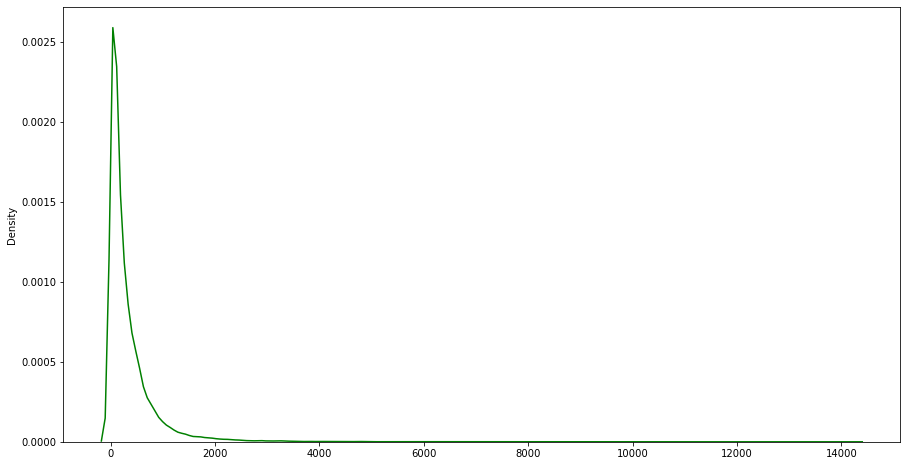

In [41]:
plt.figure(figsize=(15,8))
ax = sns.distplot(x=df['Length'], color = 'green', hist=False)
plt.show()

* The Length column is right Skewed.

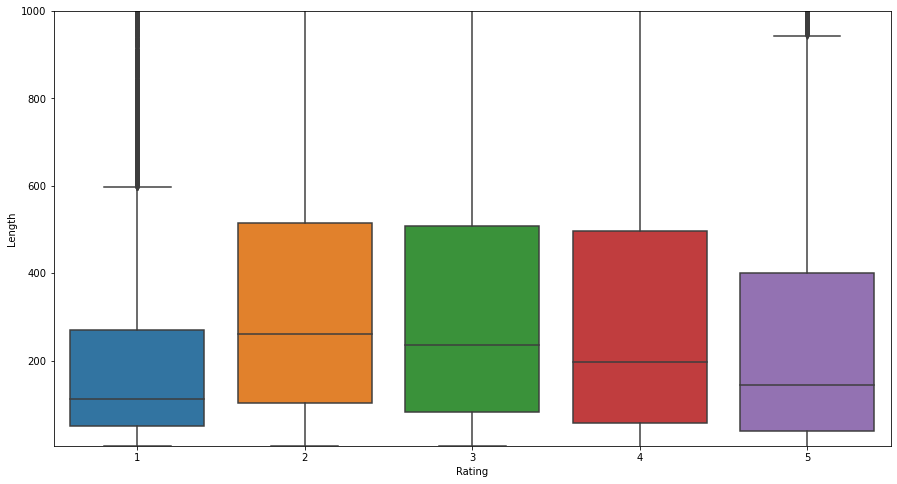

In [41]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x=df['Rating'], y=df['Length'])
plt.ylim(5, 1000)
plt.show()

* 1 star and 5 star ratings have short review lengths than others.

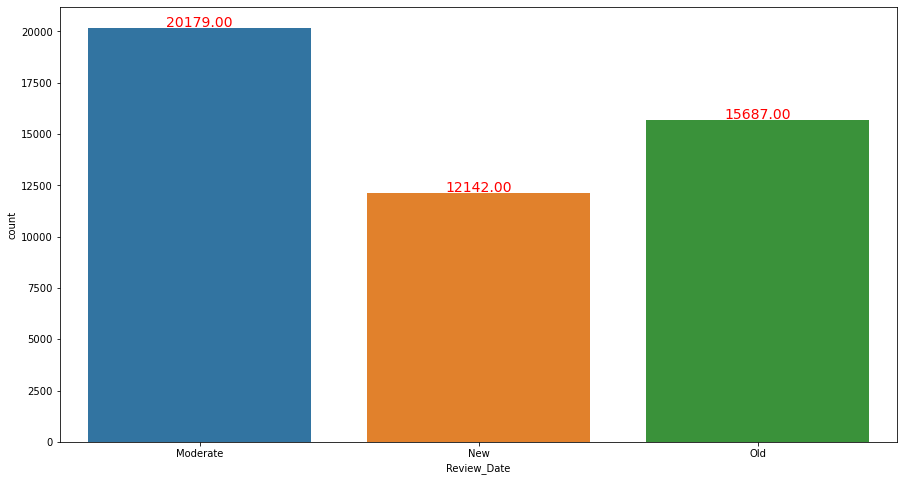

In [42]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Review_Date'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Most reviews are only months old - (In the moderate category).

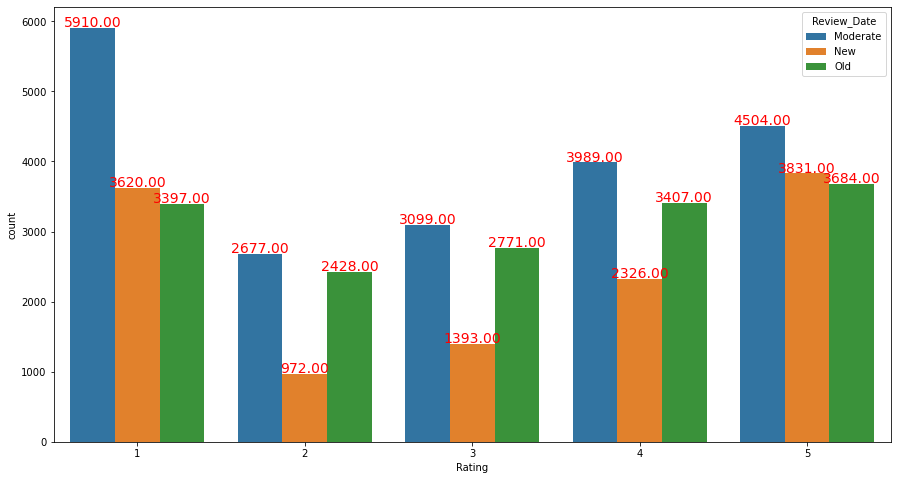

In [43]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Rating'],hue = df['Review_Date'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Most New ratings come under 1 star and 5 star category.

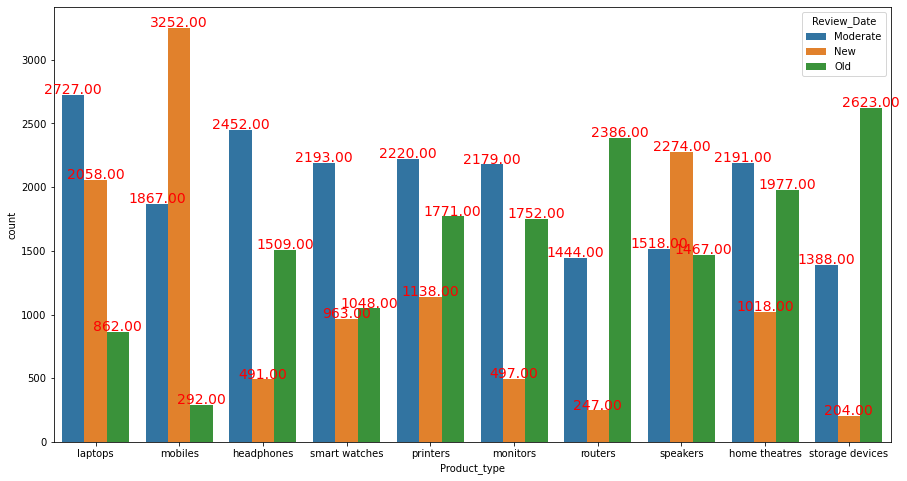

In [44]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = df['Product_type'],hue = df['Review_Date'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), fontsize=14, color='red', ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* Most of the new reviews were posted for mobile phones and speakers.
* Most of the new reviews were posted for storage devices and routers.

### MODELL BUILDING

In [53]:
# Independent Variable
x = df['Reviews_Combined']
# Dependent Variable
y = df['Rating']

In [63]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101,test_size=0.20)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect_ngram = TfidfVectorizer(ngram_range=(1,3), analyzer='word', max_features=7000) # Initializing the Tfidf vectorizer with maximum of 7000 features and with ngram range of (1,3)
tfidf_vect_ngram.fit(x_train)
x_train =  tfidf_vect_ngram.transform(x_train)
x_test =  tfidf_vect_ngram.transform(x_test)

In [65]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Initializing the models and their parameters
models = {
    "Logistic Regression" : {'model':LogisticRegression(),
                             'params':{'penalty' :['l1', 'l2', 'elasticnet'],
                                       'solver':['newton-cg'],
                                       'multi_class' :['multinomial']
                                      },
                            },
    "SVC" : {'model':SVC(),
             'params':{'kernel' :['poly', 'rbf', 'sigmoid'],
                       'gamma':['scale', 'auto']
                      },
            },
    "Decision Tree" : {'model':DecisionTreeClassifier(),
                       'params':{'n_estimators':[50,100,150],
                                 'criterion' :['gini','entropy'],
                                 'max_depth' : [5,8,50,100,150],
                                 'min_samples_leaf' : [50,100,150,200]
                                }
                      },
   
    "K Nearest Neighbors" : {'model':KNeighborsClassifier(),
                             'params':{'n_neighbors':[5,10,15],
                                       'weights':['uniform','distance'],
                                       'metric':['euclidean','manhattan','minkowski']
                                      }
                            },
    "MultinomialNB" : {'model':MultinomialNB(),
                    'params':{'alpha': [1.0,0.6, 0.3]
                             }
                    }
}

In [59]:
# Checking for the best model based on accuracy score
max_scr = 0

for i,j in models.items():
    best_model_scr = 0
    
    j['model'].fit(x_train,y_train)
    pred_test = j['model'].predict(x_test)
    acc = accuracy_score(y_test,pred_test)
    if acc > best_model_scr:
        best_model_scr = acc
    print("Model : ",j['model'])
    print("Score : ",best_model_scr)
    print('-------------------------------------------------------------------------------------------')
    if best_model_scr>max_scr:
        max_scr = best_model_scr
        best_model = j['model']
print("-------------------------------------------------------------------------------------------")    
print("Best Model : ",best_model)
print("Best Score : ",max_scr)

Model :  LogisticRegression()
Score :  0.7099562591126849
-------------------------------------------------------------------------------------------
Model :  SVC()
Score :  0.7408873151426786
-------------------------------------------------------------------------------------------
Model :  DecisionTreeClassifier()
Score :  0.6595500937304728
-------------------------------------------------------------------------------------------
Model :  KNeighborsClassifier()
Score :  0.5345761299729223
-------------------------------------------------------------------------------------------
Model :  MultinomialNB()
Score :  0.6495521766298687
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Best Model :  SVC()
Best Score :  0.7408873151426786


In [66]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(models['SVC']['model'], 
                    models['SVC']['params'], 
                    cv=4, scoring = 'accuracy')

grid.fit(x_train,y_train)
print({
    'model': 'SVC',
    'best_score' : grid.best_score_,
    'best_params' : grid.best_params_
})

{'model': 'SVC', 'best_score': 0.7309797289696854, 'best_params': {'gamma': 'scale', 'kernel': 'rbf'}}


In [67]:
# Evaluating the model
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
svc = SVC(kernel='rbf', gamma='scale', probability=True)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Classification Report : ")
print(classification_report(y_test,y_pred))

Accuracy Score :  0.7408873151426786
Classification Report : 
              precision    recall  f1-score   support

           1       0.84      0.90      0.87      2567
           2       0.66      0.51      0.57      1228
           3       0.58      0.59      0.58      1431
           4       0.70      0.67      0.68      2000
           5       0.79      0.84      0.81      2376

    accuracy                           0.74      9602
   macro avg       0.71      0.70      0.71      9602
weighted avg       0.74      0.74      0.74      9602



In [69]:
y_prob_pred = svc.predict_proba(x_test)
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.933784840835059

In [70]:
# Saving the model
import joblib
joblib.dump(svc,"Reviews_Ratings_SVC.pkl")

['Reviews_Ratings_SVC.pkl']